<a href="https://colab.research.google.com/github/Engr-Genius/DATA-ANALYSIS-WITH-PYTHON/blob/main/Data_Visualization_in_Python_Plotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:

df = pd.read_csv("/content/drive/MyDrive/heart_attack_south_africa.csv")
# or your heart disease dataset
sns.set_style("whitegrid")

df.head()

,Patient_ID,Age,Gender,Cholesterol_Level,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Smoking_Status,Alcohol_Intake,Physical_Activity,Obesity_Index,Diabetes_Status,Family_History_Heart_Disease,Diet_Quality,Stress_Level,Heart_Attack_History,Medication_Usage,Triglycerides_Level,LDL_Level,HDL_Level,Heart_Attack_Outcome
0,1,76,Female,156,94,79,No,High,Sedentary,35.2,No,No,Good,High,No,No,264,141,65,0
1,2,39,Female,160,185,88,No,Low,Sedentary,21.3,No,No,Average,Medium,No,Yes,150,81,42,0
2,3,85,Male,254,173,113,Yes,Moderate,Highly Active,32.0,Yes,No,Good,Low,No,No,220,124,70,1
3,4,45,Female,261,187,65,No,High,Sedentary,36.4,No,Yes,Average,Low,No,Yes,141,56,38,1
4,5,48,Male,206,189,84,No,Low,Active,26.6,No,No,Good,High,No,No,221,186,26,0


Advanced Cholesterol Distribution Plot

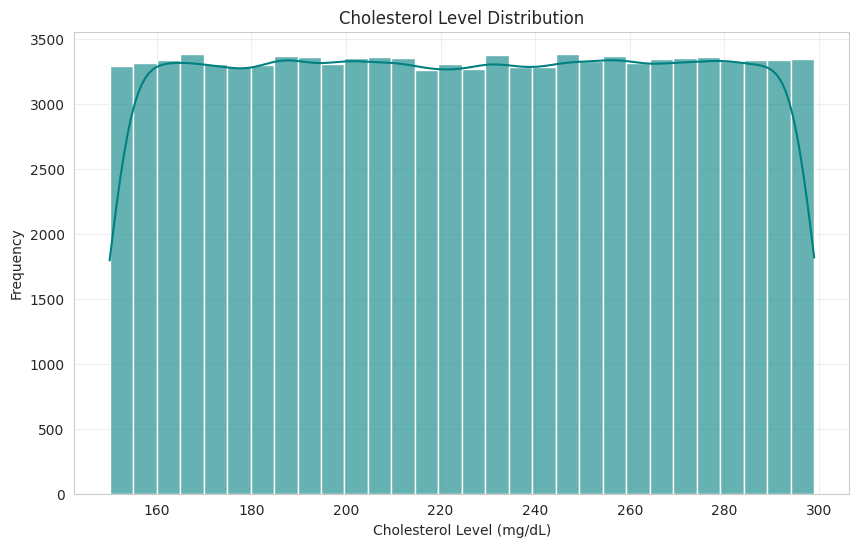

In [5]:
# Histogram + KDE Curve

plt.figure(figsize=(10, 6))

sns.histplot(
    df["Cholesterol_Level"],
    kde=True,
    bins=30,
    color="teal",
    alpha=0.6
)

plt.title("Cholesterol Level Distribution")
plt.xlabel("Cholesterol Level (mg/dL)")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)

plt.show()

Overlay Scatter Plot + Line Plot (Age vs Cholesterol)

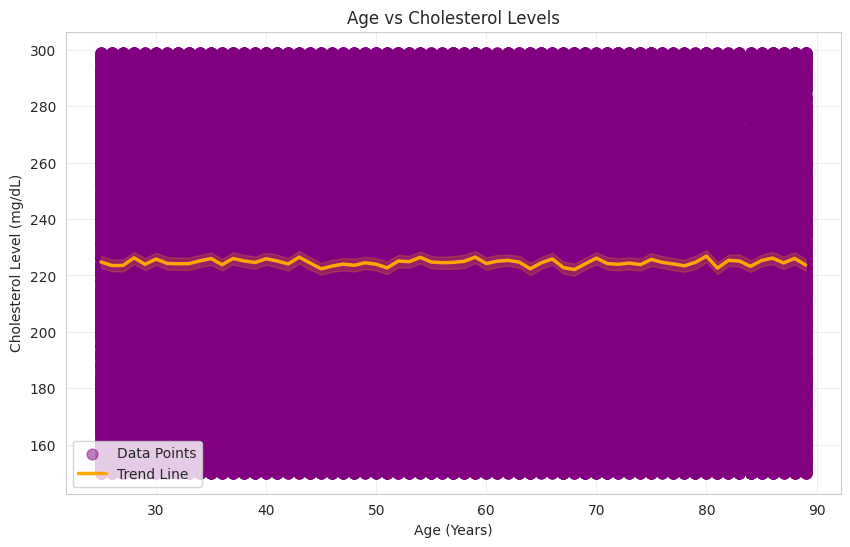

In [6]:

plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(
    df["Age"], df["Cholesterol_Level"],
    alpha=0.5, s=60, color="purple", label="Data Points"
)

# Line plot (trend)
sns.lineplot(
    x="Age",
    y="Cholesterol_Level",
    data=df,
    color="orange",
    linewidth=2.5,
    label="Trend Line"
)

plt.title("Age vs Cholesterol Levels")
plt.xlabel("Age (Years)")
plt.ylabel("Cholesterol Level (mg/dL)")
plt.legend()
plt.grid(alpha=0.3)

plt.show()

Multi-Axes Plot (Subplots)

✔ Bar chart: Cholesterol by Gender

✔ Scatter plot: Blood Pressure vs Age

/tmp/ipython-input-3207156466.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-3207156466.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


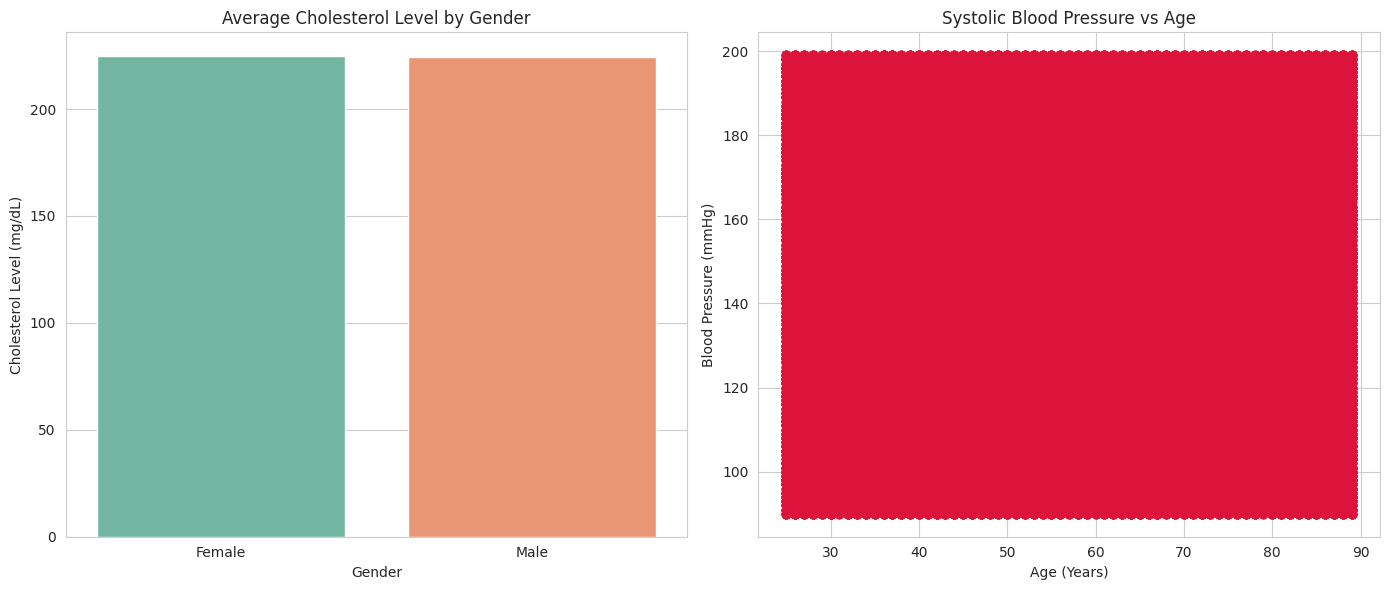

In [7]:

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# ----- Bar Chart: Cholesterol by Gender -----
sns.barplot(
    ax=ax[0],
    data=df,
    x="Gender",
    y="Cholesterol_Level",
    ci=None,
    palette="Set2"
)
ax[0].set_title("Average Cholesterol Level by Gender")
ax[0].set_xlabel("Gender")
ax[0].set_ylabel("Cholesterol Level (mg/dL)")

# ----- Scatter Plot: Blood Pressure vs Age -----
ax[1].scatter(
    df["Age"],
    df["Blood_Pressure_Systolic"],
    alpha=0.6,
    color="crimson"
)
ax[1].set_title("Systolic Blood Pressure vs Age")
ax[1].set_xlabel("Age (Years)")
ax[1].set_ylabel("Blood Pressure (mmHg)")

plt.tight_layout()
plt.show()

FacetGrid + Matplotlib Customization

In [8]:

data = pd.DataFrame({
    "age": [45, 50, 60, 55, 40, 65, 70, 48, 52, 58],
    "smoking": ["Yes", "No", "Yes", "No", "Yes", "No", "Yes", "No", "Yes", "No"],
    "diabetes": ["No", "Yes", "Yes", "No", "No", "Yes", "Yes", "No", "No", "Yes"],
    "heart_disease": [1, 0, 1, 0, 0, 1, 1, 0, 1, 0]
})

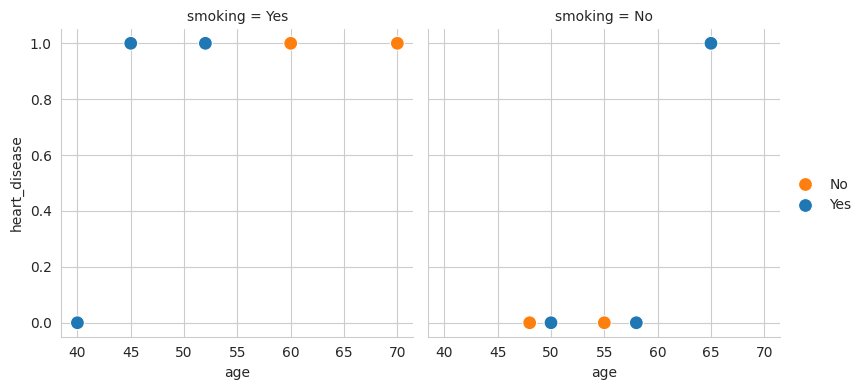

In [10]:
# FacetGrid with scatterplot

## Facet by Smoking Status, plot Age vs Heart Disease

g = sns.FacetGrid(
    data,
    col="smoking",
    height=4,
    aspect=1
)

g.map_dataframe(
    sns.scatterplot,
    x="age",
    y="heart_disease",
    hue="diabetes",
    s=100
)

g.add_legend()

In [11]:
## Matplotlib Customization

for ax in g.axes.flat:
    ax.set_xticklabels(["No Disease", "Disease"])
    ax.set_xlabel("Heart Disease Status")
    ax.set_ylabel("Age")

g.fig.suptitle(
    "Age Distribution by Heart Disease and Diabetes Status",
    fontsize=14
)

plt.subplots_adjust(top=0.85)
plt.show()

/tmp/ipython-input-1836790668.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["No Disease", "Disease"])
/tmp/ipython-input-1836790668.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["No Disease", "Disease"])


<Figure size 640x480 with 0 Axes>

Question 2

In [12]:
# Interactive 3D
!pip install plotly

In [13]:

import pandas as pd
import plotly.express as px

In [15]:
df = pd.DataFrame({
    "Age": [45, 54, 60, 50, 67, 58, 62, 49, 55, 70],
    "Cholesterol_Level": [210, 250, 230, 200, 270, 240, 260, 220, 235, 280],
    "Blood_Pressure_Systolic": [130, 145, 150, 135, 160, 148, 155, 138, 142, 165],
    "Heart_Attack_Outcome": [0, 1, 1, 0, 1, 0, 1, 0, 1, 1],
    "Gender": ["Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male"],
    "Diabetes_Status": ["No", "Yes", "Yes", "No", "Yes", "No", "Yes", "No", "No", "Yes"],
    "Obesity_Index": [27.5, 32.1, 30.4, 26.8, 34.0, 29.2, 33.5, 28.1, 31.0, 35.2]
})

In [18]:
# Interactive 3D Scatter plot

fig = px.scatter_3d(
    df,
    x="Age",
    y="Cholesterol_Level",
    z="Blood_Pressure_Systolic",
    color="Heart_Attack_Outcome",
    symbol="Heart_Attack_Outcome",
    color_continuous_scale="RdYlGn_r",
    hover_data={
        "Gender": True,
        "Diabetes_Status": True,
        "Obesity_Index": True,
        "Age": False,
        "Cholesterol_Level": False,
        "Blood_Pressure_Systolic": False
    },
    title="Interactive 3D Scatter Plot of Heart Attack Risk Factors"
)

In [19]:
#Layout Customization

fig.update_layout(
    scene=dict(
        xaxis_title="Age",
        yaxis_title="Cholesterol Level",
        zaxis_title="Systolic Blood Pressure"
    ),
    legend_title_text="Heart Attack Outcome",
    height=600
)

fig.show()

In [20]:
# 3D Surface Plot of Predicted Heart Attack Risk

!pip install plotly scikit-learn

In [21]:

import numpy as np
import pandas as pd
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [22]:

df = pd.DataFrame({
    "Age": [45, 54, 60, 50, 67, 58, 62, 49, 55, 70],
    "Cholesterol_Level": [210, 250, 230, 200, 270, 240, 260, 220, 235, 280],
    "Heart_Attack_Outcome": [0, 1, 1, 0, 1, 0, 1, 0, 1, 1]
})

In [23]:
# Feature Selection

X = df[["Age", "Cholesterol_Level"]]
y = df["Heart_Attack_Outcome"]

In [24]:
# Train - Test Spilt

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [25]:
# Feature Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Train Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [27]:
# Surface Plot Construction

## Create mesh grid
age_range = np.linspace(df["Age"].min(), df["Age"].max(), 50)
chol_range = np.linspace(df["Cholesterol_Level"].min(), df["Cholesterol_Level"].max(), 50)

age_grid, chol_grid = np.meshgrid(age_range, chol_range)

In [28]:
# Predict risk probabilities over grids

age_range = np.linspace(df["Age"].min(), df["Age"].max(), 50)
chol_range = np.linspace(df["Cholesterol_Level"].min(), df["Cholesterol_Level"].max(), 50)

age_grid, chol_grid = np.meshgrid(age_range, chol_range)

In [30]:
# 3D Surface Plot with plotly

# Prepare data for prediction
# Flatten the grids for prediction
plot_data = pd.DataFrame({
    "Age": age_grid.ravel(),
    "Cholesterol_Level": chol_grid.ravel()
})

# Scale the grid data using the previously fitted scaler
plot_data_scaled = scaler.transform(plot_data)

# Predict the probability of heart attack (class=1)
risk_probabilities = model.predict_proba(plot_data_scaled)[:, 1]

# Reshape the probabilities back into a 2D array for the surface plot
risk_surface = risk_probabilities.reshape(age_grid.shape)

fig = go.Figure(
    data=[
        go.Surface(
            x=age_grid,
            y=chol_grid,
            z=risk_surface,
            colorscale="RdYlGn_r",
            colorbar=dict(title="Heart Attack Risk Probability")
        )
    ]
)

In [31]:
# Layout Customization

fig.update_layout(
    title="3D Surface Plot of Predicted Heart Attack Risk",
    scene=dict(
        xaxis_title="Age",
        yaxis_title="Cholesterol Level",
        zaxis_title="Predicted Risk Probability"
    ),
    height=650
)

fig.show()

Clustering Analysis with 3D Visualization (Dash + Plotly)

In [32]:
!pip install dash plotly scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 55.1 MB/s eta 0:00:00


In [33]:

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output

In [34]:

df = pd.DataFrame({
    "Patient_ID": range(1, 16),
    "Age": [45, 54, 60, 50, 67, 58, 62, 49, 55, 70, 52, 63, 48, 59, 66],
    "Cholesterol_Level": [210, 250, 230, 200, 270, 240, 260, 220, 235, 280, 225, 255, 215, 245, 275],
    "Blood_Pressure_Systolic": [130, 145, 150, 135, 160, 148, 155, 138, 142, 165, 140, 158, 132, 150, 162],
    "Obesity_Index": [27.5, 32.1, 30.4, 26.8, 34.0, 29.2, 33.5, 28.1, 31.0, 35.2, 29.0, 33.0, 27.0, 31.5, 34.5]
})

In [35]:
# Data Preparation

features = ["Age", "Cholesterol_Level", "Blood_Pressure_Systolic", "Obesity_Index"]

X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
# Dash app layout
app = Dash(__name__)

app.layout = html.Div(
    [
        html.H2("3D Clustering of Heart Attack Risk Factors"),

        dcc.Dropdown(
            id="k-dropdown",
            options=[{"label": f"{k} Clusters", "value": k} for k in range(2, 7)],
            value=3,
            clearable=False,
            style={"width": "300px"}
        ),

        dcc.Graph(id="cluster-3d-plot")
    ],
    style={"padding": "20px"}
)

In [37]:
# Dash callback (dynamic clustering)

@app.callback(
    Output("cluster-3d-plot", "figure"),
    Input("k-dropdown", "value")
)
def update_clusters(k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    df["Cluster"] = clusters.astype(str)

    fig = go.Figure()

    for cluster in sorted(df["Cluster"].unique()):
        cluster_df = df[df["Cluster"] == cluster]

        fig.add_trace(
            go.Scatter3d(
                x=cluster_df["Age"],
                y=cluster_df["Cholesterol_Level"],
                z=cluster_df["Blood_Pressure_Systolic"],
                mode="markers",
                name=f"Cluster {cluster}",
                marker=dict(size=6),
                hovertext=
                    "Patient ID: " + cluster_df["Patient_ID"].astype(str) +
                    "<br>Obesity Index: " + cluster_df["Obesity_Index"].astype(str),
                hoverinfo="text"
            )
        )

    fig.update_layout(
        title=f"3D Patient Clusters (k = {k})",
        scene=dict(
            xaxis_title="Age",
            yaxis_title="Cholesterol Level",
            zaxis_title="Systolic Blood Pressure"
        ),
        height=650
    )

    return fig

In [39]:
# Running the App

app.run(debug=True, port=8050)

Dash is running on http://127.0.0.1:8050/



INFO:dash.dash:Dash is running on http://127.0.0.1:8050/



 * Serving Flask app '__main__'
 * Debug mode: on


Data Filtering and export dashboard

In [40]:
!pip install dash plotly pandas

In [41]:

import pandas as pd
from dash import Dash, dcc, html, Input, Output, State
import plotly.express as px

In [42]:
# Sample dataset

df = pd.DataFrame({
    "Patient_ID": range(1, 21),
    "Age": [45, 54, 60, 50, 67, 58, 62, 49, 55, 70, 52, 63, 48, 59, 66, 46, 57, 61, 53, 68],
    "Gender": ["Male", "Female"] * 10,
    "Heart_Attack_Outcome": [0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1]
})

In [43]:
# Dash app Layout

app = Dash(__name__)

app.layout = html.Div(
    [
        html.H2("Heart Attack Outcome Dashboard"),

        html.Div(
            [
                html.Label("Select Gender"),
                dcc.Dropdown(
                    id="gender-filter",
                    options=[
                        {"label": "All", "value": "All"},
                        {"label": "Male", "value": "Male"},
                        {"label": "Female", "value": "Female"}
                    ],
                    value="All",
                    clearable=False,
                    style={"width": "250px"}
                )
            ],
            style={"margin-bottom": "20px"}
        ),

        dcc.Graph(id="bar-chart"),

        html.Button(
            "Download Filtered Data (CSV)",
            id="download-btn",
            style={"margin-top": "20px"}
        ),

        dcc.Download(id="download-dataframe-csv")
    ],
    style={"padding": "30px"}
)

In [45]:
# Call back: bar chart (Heart attack outcome distribution)

@app.callback(
    Output("bar-chart", "figure"),
    Input("gender-filter", "value")
)
def update_bar_chart(selected_gender):
    if selected_gender == "All":
        filtered_df = df
    else:
        filtered_df = df[df["Gender"] == selected_gender]

    count_df = filtered_df["Heart_Attack_Outcome"].value_counts().reset_index()
    count_df.columns = ["Heart_Attack_Outcome", "Count"]

    fig = px.bar(
        count_df,
        x="Heart_Attack_Outcome",
        y="Count",
        text="Count",
        title="Filtered Heart Attack Outcome Distribution (Bar Chart)"
    )

    fig.update_layout(
        xaxis_title="Heart Attack Outcome (0 = No, 1 = Yes)",
        yaxis_title="Number of Patients"
    )

    return fig

In [46]:
# Callback: Download Filtered Dataset as CSV

@app.callback(
    Output("download-dataframe-csv", "data"),
    Input("download-btn", "n_clicks"),
    State("gender-filter", "value"),
    prevent_initial_call=True
)
def download_filtered_data(n_clicks, selected_gender):
    if selected_gender == "All":
        filtered_df = df
    else:
        filtered_df = df[df["Gender"] == selected_gender]

    return dcc.send_data_frame(
        filtered_df.to_csv,
        "filtered_heart_attack_data.csv",
        index=False
    )

In [48]:
# Running the dashboard

app.run(debug=True, port=8050)

Dash is running on http://127.0.0.1:8050/



INFO:dash.dash:Dash is running on http://127.0.0.1:8050/



 * Serving Flask app '__main__'
 * Debug mode: on
